# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Загрузим набор данных и посмотрим на него:

In [2]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, 
                   names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status","occupation", 
                          "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"],
                  skipinitialspace=True, na_values='?')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Вопрос 1
Сколько мужчин и женщин в выборке?

In [5]:
data.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [6]:
num_m =  data.sex.value_counts()[0]
num_f = data.sex.value_counts()[1]

print('В выборке', num_m, 'мужчин и', num_f, 'женщина')

В выборке 21790 мужчин и 10771 женщина


### Вопрос 2
Каков средний возраст мужчин?


In [7]:
male_age_mean = data[data['sex']=='Male']['age'].mean()

print('Средний возраст мужчин составляет', round(male_age_mean, 1), 'лет')

Средний возраст мужчин составляет 39.4 лет


### Вопрос 3
Какова доля граждан США?

In [8]:
US_prop = data[data['native-country']=='United-States']['native-country'].count() / data.shape[0]

print('Доля граждан США составляет', round(US_prop, 3))

Доля граждан США составляет 0.896


### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

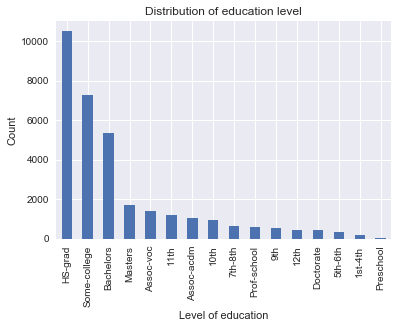

In [9]:
data['education'].value_counts().plot(kind='bar')
plt.title('Distribution of education level')
plt.xlabel('Level of education')
plt.ylabel('Count')

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [10]:
fnlwgt_mean = data[data['marital-status']=='Divorced']['fnlwgt'].mean()
fnlwgt_std = data[data['marital-status']=='Divorced']['fnlwgt'].std()

print('Среднее переменной "final weight" для разведённых людей составляет', round(fnlwgt_mean))
print('Стандартное отклонение переменной "final weight" для разведённых людей составляет',round(fnlwgt_std))

Среднее переменной "final weight" для разведённых людей составляет 185803
Стандартное отклонение переменной "final weight" для разведённых людей составляет 105647


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

[Из описания](https://artax.karlin.mff.cuni.cz/r-help/library/arules/html/Adult.html) данных узнаём градацию признака education: Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate

Выделяем три последних особо:

In [11]:
higher = ['Bachelors', 'Masters', 'Doctorate']

Посмотрим, сколько человек в каждой категории зарабатывают более 50K:

In [12]:
data[data['50K']=='>50K']['education'].value_counts()

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

In [13]:
higher_total = data[(data['50K']=='>50K') & (data['education'].isin(higher))]['education'].value_counts().sum()
total = data[data['50K']=='>50K']['50K'].count()
prop = higher_total / total

print('Доля людей с высшим образованием, имеющих доход больше 50K равна', round(prop, 3))

Доля людей с высшим образованием, имеющих доход больше 50K равна 0.445


Из всех людей, доля тех, кто имеет высшее образование и доход более 50K, не превышает половины, следовательно, ошибочно утверждать, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование. То есть ответ – неправда.

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

Сгруппируем данные по расе и выведем максимальное значение каждой группы:

In [14]:
pd.DataFrame(data.groupby(['race', 'sex'])['age'].max())

age
race               sex        
Amer-Indian-Eskimo Female   80
                   Male     82
Asian-Pac-Islander Female   75
                   Male     90
Black              Female   90
                   Male     90
Other              Female   74
                   Male     77
White              Female   90
                   Male     90

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [15]:
farmers_countries = data[data['occupation']=='Farming-fishing']['native-country'].unique().tolist()

print('Люди из следующих стран работают фермерами или рыбаками:', *farmers_countries, sep=', ', end='.')

Люди из следующих стран работают фермерами или рыбаками:, United-States, Cambodia, Poland, Guatemala, Mexico, England, nan, Philippines, Italy, Puerto-Rico, Vietnam, Germany, Japan, Canada, Yugoslavia, Cuba, Portugal, El-Salvador, Hong, Ireland, France.

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?

In [16]:
mbmm = data[(data['sex']=='Male') & (data['education']=='Bachelors')].shape[0] / data[(data['sex']=='Male') & (data['education']=='Masters')].shape[0]
fbfm = data[(data['sex']=='Female') & (data['education']=='Bachelors')].shape[0] / data[(data['sex']=='Female') & (data['education']=='Masters')].shape[0]

print('Отношение количества мужчин-бакалавров к мужчинам-магистрам:', round(mbmm, 2))
print('Отношение количества женщин-бакалавров к женщинам-магистрам:', round(fbfm, 2))

if mbmm > fbfm:
    print('Отношение колчества мужчин-бакалавров к мужчинам-магистрам больше')
elif mbmm < fbfm:
    print('Отношение колчества женщин-бакалавров к женщинам-магистрам больше')
else:
    print('Данные отношения равны')

Отношение количества мужчин-бакалавров к мужчинам-магистрам: 3.15
Отношение количества женщин-бакалавров к женщинам-магистрам: 3.02
Отношение колчества мужчин-бакалавров к мужчинам-магистрам больше


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [17]:
maxhs = data['hours-per-week'].max() # максимальное значение признака
maxhs_peoplecount = data[data['hours-per-week']==maxhs].shape[0] # количество строк в таблице = количество людей

print('Максимальное количество рабочих часов в неделю составляет', maxhs)
print(maxhs_peoplecount, 'человек работают столько часов в неделю')

Максимальное количество рабочих часов в неделю составляет 99
85 человек работают столько часов в неделю


In [18]:
reach = data[data['hours-per-week']==maxhs]['50K'].value_counts()[0]
less_reach = data[data['hours-per-week']==maxhs]['50K'].value_counts()[1]

print('Срдеи работающих 99 часов в неделю', reach, 'человек получают з/п больше 50K и', less_reach, '– меньше.')

Срдеи работающих 99 часов в неделю 60 человек получают з/п больше 50K и 25 – меньше.
